In [ ]:
!pip install -U --user dirty_cat


In [43]:
import numpy as np
import pandas as pd


In [44]:
# train = pd.read_csv("finalmodel.csv")
# train.head()

In [45]:
# train.shape

In [46]:
train = pd.read_csv("../input/crop-yield/model1.csv")
train.head()

,District_Name,Season,Area,Production,Crop
0,NORTH AND MIDDLE ANDAMAN,Rabi,294.5,90.8,Tur
1,SOUTH ANDAMANS,Rabi,20.5,13.2,Tur
2,ANANTAPUR,Kharif,21400.0,2600.0,Tur
3,ANANTAPUR,Kharif,27400.0,9100.0,Tur
4,ANANTAPUR,Kharif,30693.0,7888.0,Tur


In [47]:
import tensorflow as tf
p = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(p[0], 'GPU')

In [48]:
train.shape

(124969, 5)

In [49]:
train.isna().sum()

District_Name       0
Season              0
Area                0
Production       1526
Crop                0
dtype: int64

In [50]:
train.Production.fillna(train["Production"].mean(),inplace = True)
train.isna().sum()

District_Name    0
Season           0
Area             0
Production       0
Crop             0
dtype: int64

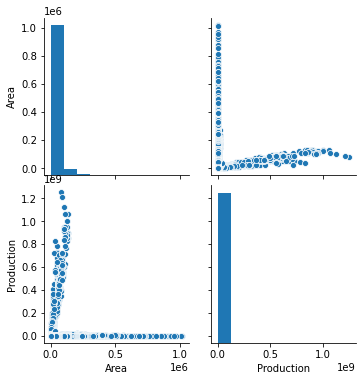

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(train)

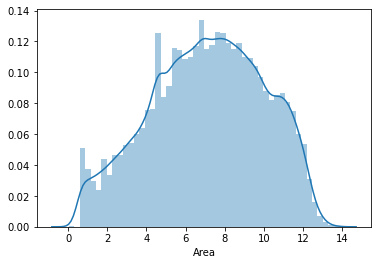

In [52]:
sns.distplot(pd.Series(np.log1p(train["Area"])))

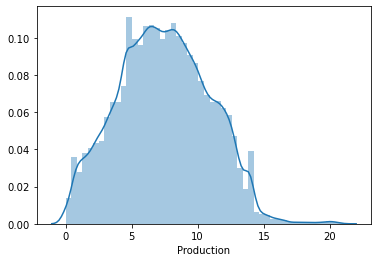

In [53]:
# sns.distplot(train["Production"])
sns.distplot(pd.Series(np.log1p(train["Production"])))


In [54]:
num_cols = ["Area","Production"]
for c in num_cols:
    train[c] = train[c].apply(lambda x: (np.log1p(x)))
train.head()    

,District_Name,Season,Area,Production,Crop
0,NORTH AND MIDDLE ANDAMAN,Rabi,5.688669,4.519612,Tur
1,SOUTH ANDAMANS,Rabi,3.068053,2.653242,Tur
2,ANANTAPUR,Kharif,9.971193,7.863651,Tur
3,ANANTAPUR,Kharif,10.218335,9.116140,Tur
4,ANANTAPUR,Kharif,10.331822,8.973225,Tur


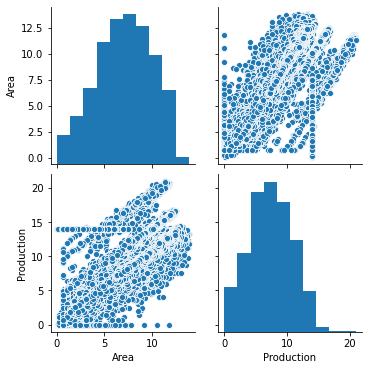

In [55]:
sns.pairplot(train)

In [56]:
train.Crop.unique()
train.drop(train.loc[train["Crop"]=='Cotton(lint)'].index,inplace = True)
train.drop(train.loc[train["Crop"]=='Moong(Green Gram)'].index,inplace = True)

train.Crop.unique()

array(['Tur', 'Bajra', 'Coconut ', 'Groundnut', 'Jowar', 'Maize',
       'Niger seed', 'Paddy', 'Ragi', 'Rice', 'Sesamum', 'Soyabean',
       'Sugarcane', 'Sunflower', 'Urad', 'Wheat'], dtype=object)

In [57]:
train.Crop.value_counts()

Rice          15104
Maize         13947
Urad           9850
Sesamum        9046
Groundnut      8834
Sugarcane      7921
Wheat          7899
Tur            7578
Jowar          7065
Sunflower      5571
Bajra          5427
Ragi           4145
Soyabean       3212
Niger seed     2070
Coconut        1985
Paddy           479
Name: Crop, dtype: int64

In [58]:
train.head()

,District_Name,Season,Area,Production,Crop
0,NORTH AND MIDDLE ANDAMAN,Rabi,5.688669,4.519612,Tur
1,SOUTH ANDAMANS,Rabi,3.068053,2.653242,Tur
2,ANANTAPUR,Kharif,9.971193,7.863651,Tur
3,ANANTAPUR,Kharif,10.218335,9.116140,Tur
4,ANANTAPUR,Kharif,10.331822,8.973225,Tur


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["Crop"] = le.fit_transform(train["Crop"])

In [61]:
target = train["Crop"]
train.drop(labels = ["Crop"],axis=1,inplace = True)

In [63]:
train.head()

,District_Name,Season,Area,Production
0,NORTH AND MIDDLE ANDAMAN,Rabi,5.688669,4.519612
1,SOUTH ANDAMANS,Rabi,3.068053,2.653242
2,ANANTAPUR,Kharif,9.971193,7.863651
3,ANANTAPUR,Kharif,10.218335,9.116140
4,ANANTAPUR,Kharif,10.331822,8.973225


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(
    train,target, test_size=0.20, 
    stratify=target, random_state=75)

In [65]:
X_train_dist = X_train['District_Name']
X_train_season= X_train['Season']

X_cv_dist = X_cv['District_Name']
X_cv_season = X_cv['Season']

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf1 = TfidfVectorizer(min_df=3, token_pattern=r'\w{3,}', ngram_range=(1,3), max_df=0.9)
tf2 = TfidfVectorizer(min_df=2, token_pattern=r'\w{3,}')

X_train_dist = tf1.fit_transform(X_train_dist)
X_train_season = tf2.fit_transform(X_train_season)

X_cv_dist = tf1.transform(X_cv_dist)
X_cv_season = tf2.transform(X_cv_season)

In [67]:
train.head()

,District_Name,Season,Area,Production
0,NORTH AND MIDDLE ANDAMAN,Rabi,5.688669,4.519612
1,SOUTH ANDAMANS,Rabi,3.068053,2.653242
2,ANANTAPUR,Kharif,9.971193,7.863651
3,ANANTAPUR,Kharif,10.218335,9.116140
4,ANANTAPUR,Kharif,10.331822,8.973225


In [68]:
from scipy import sparse
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
X_train_prod= sc1.fit_transform(np.array(X_train['Production']).reshape(-1,1))
X_cv_prod = sc1.transform(np.array(X_cv['Production']).reshape(-1,1))
X_train_prod = sparse.csr_matrix(X_train_prod)
X_cv_prod = sparse.csr_matrix(X_cv_prod)

sc2 = StandardScaler()
X_train_Area = sc2.fit_transform(np.array(X_train['Area']).reshape(-1,1))
X_cv_Area = sc2.transform(np.array(X_cv['Area']).reshape(-1,1))
X_train_Area = sparse.csr_matrix(X_train_Area)
X_cv_Area = sparse.csr_matrix(X_cv_Area)

In [69]:
from scipy.sparse import hstack, csr_matrix

merged_train = hstack((X_train_dist, X_train_season, X_train_prod, X_train_Area))
merged_cv  = hstack((X_cv_dist, X_cv_season, X_cv_prod, X_cv_Area))

In [70]:
merged_train.shape, merged_cv.shape


((88106, 780), (22027, 780))

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [72]:
import lightgbm as lgb
train_data = lgb.Dataset(merged_train, label=y_train)
test_data = lgb.Dataset(merged_cv, label=y_cv)

In [77]:
param = {'objective': 'multiclass',
         'num_iterations': 80,
         'learning_rate': 0.04,  
         'num_leaves': 23,
         'max_depth': 7, 
         'min_data_in_leaf': 28, 
         'max_bin': 10, 
         'min_data_in_bin': 3,   
         'num_class': 16,
         'metric': 'multi_logloss'
         }

In [78]:
lgbm = lgb.train(params=param,
                 train_set=train_data,
                 num_boost_round=100,
                 valid_sets=[test_data])

y_pred_class = lgbm.predict(merged_cv)

[1]	valid_0's multi_logloss: 2.53764
[2]	valid_0's multi_logloss: 2.49307
[3]	valid_0's multi_logloss: 2.45438
[4]	valid_0's multi_logloss: 2.42006
[5]	valid_0's multi_logloss: 2.38854
[6]	valid_0's multi_logloss: 2.36023
[7]	valid_0's multi_logloss: 2.33392
[8]	valid_0's multi_logloss: 2.30955
[9]	valid_0's multi_logloss: 2.28595
[10]	valid_0's multi_logloss: 2.26415
[11]	valid_0's multi_logloss: 2.24336
[12]	valid_0's multi_logloss: 2.22405
[13]	valid_0's multi_logloss: 2.20594
[14]	valid_0's multi_logloss: 2.18846
[15]	valid_0's multi_logloss: 2.17208
[16]	valid_0's multi_logloss: 2.1562
[17]	valid_0's multi_logloss: 2.14141
[18]	valid_0's multi_logloss: 2.1274
[19]	valid_0's multi_logloss: 2.11378
[20]	valid_0's multi_logloss: 2.10088
[21]	valid_0's multi_logloss: 2.08856
[22]	valid_0's multi_logloss: 2.07667
[23]	valid_0's multi_logloss: 2.06534
[24]	valid_0's multi_logloss: 2.05443
[25]	valid_0's multi_logloss: 2.04366
[26]	valid_0's multi_logloss: 2.03332
[27]	valid_0's multi_lo

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:546: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


In [80]:
predictions = lgbm.predict(merged_cv)

y_pred_class = []
for x in predictions:
    y_pred_class.append(np.argmax(x))

y_pred_class = le.inverse_transform(y_pred_class)

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:546: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


In [81]:
df_sub = pd.DataFrame(data=y_pred_class, columns=['Crop'])


In [82]:
df_sub

,Crop
0,Urad
1,Maize
2,Maize
3,Rice
4,Maize
...,...
22022,Wheat
22023,Rice
22024,Urad
22025,Urad


In [88]:
y_cv_ = le.inverse_transform(y_cv)
y_cv, y_pred_class

(117023    14
 63550      7
 41558      4
 72513      8
 36080      4
           ..
 103318    12
 21391      2
 82023      9
 65272      7
 26597      2
 Name: Crop, Length: 22027, dtype: int64,
 array(['Urad', 'Maize', 'Maize', ..., 'Urad', 'Urad', 'Wheat'],
       dtype=object))

In [85]:
def accuracy(preds,y_test):
    acc = (preds == y_test).sum().astype(float) / len(preds)*100
    return acc

In [89]:
accuracy(y_pred_class,y_cv_)

40.259681300222454